In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

NivelRiodoSul      0
NivelItuporanga    0
ChuvaItuporanga    0
NivelTaio          0
ChuvaTaio          0
dtype: int64
25131


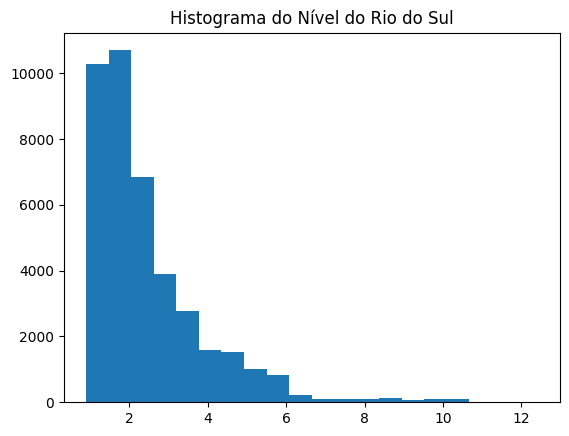

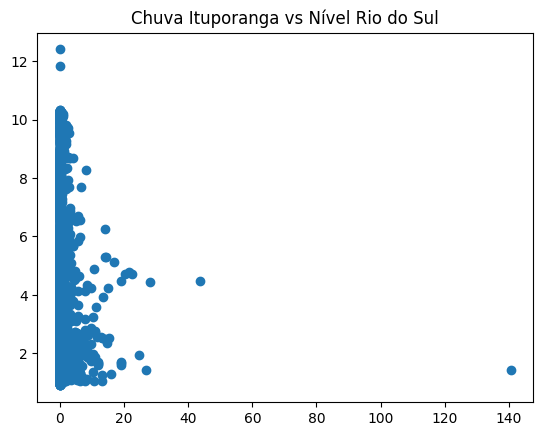

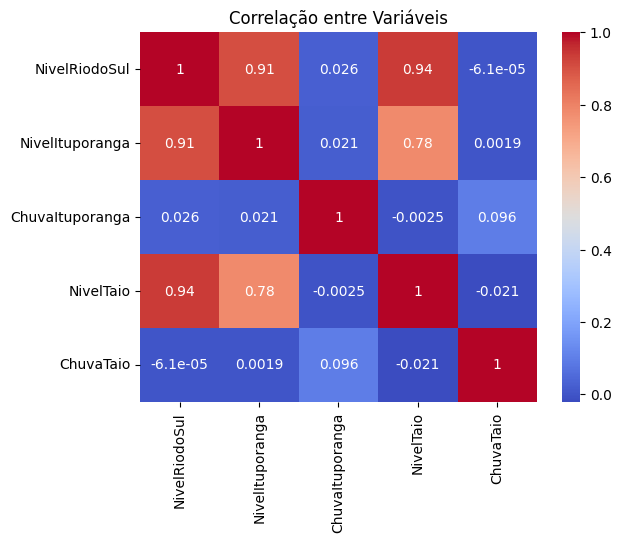

In [ ]:
# 1. Leitura e Análise Inicial
df = pd.read_excel('dados_rio_e_chuva.xlsx')

# Convert river levels from centimeters to meters
df['NivelRiodoSul'] = df['NivelRiodoSul'] / 100
df['NivelItuporanga'] = df['NivelItuporanga'] / 100
df['NivelTaio'] = df['NivelTaio'] / 100

print(df.isnull().sum())  # Verificar valores faltantes
df = df.dropna()  # Remover linhas com valores faltantes
print(df.duplicated().sum())  # Verificar duplicatas
df = df.drop_duplicates()  # Remover duplicatas

# Histograma da variável alvo
plt.hist(df['NivelRiodoSul'], bins=20)
plt.title('Histograma do Nível do Rio do Sul')
plt.show()

# Scatter plot
plt.scatter(df['ChuvaItuporanga'], df['NivelRiodoSul'])
plt.title('Chuva Ituporanga vs Nível Rio do Sul')
plt.show()

# Heatmap de correlação
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

In [3]:
# 2. Pré-processamento
X = df[['NivelItuporanga', 'ChuvaItuporanga', 'NivelTaio', 'ChuvaTaio']]  # Variáveis de entrada
y = df['NivelRiodoSul']  # Variável alvo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')  # Save the fitted scaler
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [4]:
# 3. Treinamento do Modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, MAE: {mae}, R²: {r2}')

RMSE: 0.29271481502625957, MAE: 0.18548993125118818, R²: 0.9572045748376021


In [5]:
# 4. Salvar o Modelo
joblib.dump(model, 'modelo_previsao_rio.pkl')

['modelo_previsao_rio.pkl']